In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

padding way must be replica or constant


TypeError: Image data cannot be converted to float

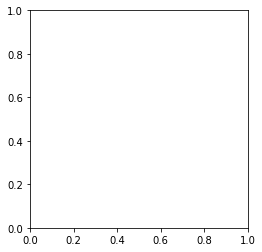

In [7]:
def medianBlur(img, kernel, padding_way):
    """
    :param img: ndarray
    :param kernel: int
    :param padding_way: 'REPLICA' & 'ZERO'
    :return:
    """
    def getMedianNdarray(matrix):
        height, width = matrix.shape
        padding_size = kernel//2
        padding_matrix_way = 'edge' if padding_way == 'replica' else 'constant'
        padding_matrix = np.pad(matrix, (padding_size, padding_size), padding_matrix_way)
        for i in range(0, width):
            for j in range(0, height):
                matrix[j, i] = int(np.median(padding_matrix[j:j+2*padding_size+1, i:i+2*padding_size+1]))
    height, width, channel = img.shape
    if kernel%2 == 0:
        print("kernel must be odd number")
        return
    if padding_way not in ['replice', 'zero']:
        print("padding way must be replica or constant")
        return
    if channel == 1:
        matrix = np.copy(img)
        getMedianNdarray(matrix)
        return matrix
    elif channel == 3:
        b, g, r = cv2.split(img)
        getMedianNdarray(b)
        getMedianNdarray(g)
        getMedianNdarray(r)
        matrix = cv2.merge((b, g, r))
        return matrix
    else:
        print('img channel must be 1 or 3')
        return

if __name__ == '__main__':
    img = cv2.imread('board.jpg')
    plt.imshow(medianBlur(img, 5, 'replica'))
    plt.show()